In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud_Analysis_Dataset(in).csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [4]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
3982,2,PAYMENT,15186.43,C1535454025,20145.00,4958.57,M215690645,0.00,0.00,0
6589,5,CASH_OUT,269130.70,C178838760,12857.29,0.00,C1870252780,6838515.48,8598427.92,0
3060,1,PAYMENT,21840.26,C1532800776,0.00,0.00,M600657906,0.00,0.00,0
5772,4,PAYMENT,34.85,C1793759719,27430.00,27395.15,M476709123,0.00,0.00,0
4292,2,PAYMENT,1150.36,C1853633821,41699.00,40548.64,M2068450031,0.00,0.00,0


In [5]:
print("Dataset Information:")
print(f"Total Rows: {len(df)}")
print(f"Columns: {df.columns.tolist()}")


Dataset Information:
Total Rows: 11142
Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [6]:
print(df.isnull().sum())


step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


In [7]:
fraud_dist = df['isFraud'].value_counts()
print(f"Fraud Distribution:\n{df['isFraud'].value_counts(normalize=True).apply(lambda x: f'{x:.4%}')}")

print("\n" * 1)

print("\nFraud Distribution:")
print(fraud_dist)

Fraud Distribution:
isFraud
0    89.7505%
1    10.2495%
Name: proportion, dtype: object



Fraud Distribution:
isFraud
0    10000
1     1142
Name: count, dtype: int64


In [8]:
print("\n Dataset Overview:")
print(f"Total Rows: {len(df):,}")


 Dataset Overview:
Total Rows: 11,142


In [9]:
print(f"Columns: {df.columns.tolist()}")


Columns: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']


In [10]:
print("\n Transaction Types:\n", df['type'].value_counts(normalize=True).apply(lambda x: f'{x:.2%}'))
print("\n" * 2)
print(f"fraud val_count:{df['type'].value_counts()}")


 Transaction Types:
 type
PAYMENT     49.45%
CASH_IN     17.51%
CASH_OUT    16.79%
TRANSFER    13.14%
DEBIT        3.11%
Name: proportion, dtype: object



fraud val_count:type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


In [12]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,11142.000000,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,1.114200e+04,11142.000000
mean,8.717645,2.131915e+05,9.241173e+05,8.249576e+05,8.883541e+05,1.103211e+06,0.102495
std,16.067479,7.600650e+05,2.143004e+06,2.089894e+06,2.601376e+06,2.982447e+06,0.303312
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2.000000,4.946618e+03,4.270000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,6.000000,1.676126e+04,2.816950e+04,4.420605e+03,0.000000e+00,0.000000e+00,0.000000
75%,7.000000,1.543366e+05,3.040855e+05,1.114126e+05,2.711555e+05,3.186374e+05,0.000000
max,95.000000,1.000000e+07,1.990000e+07,1.300000e+07,3.300000e+07,3.460000e+07,1.000000


In [13]:
df.shape

(11142, 10)

In [14]:
round((df['isFraud'].value_counts()[1]/df.shape[0]) * 100,2)

np.float64(10.25)


 Transaction Type Distribution by Fraud Status:
isFraud         0       1
type                     
CASH_IN   100.00%   0.00%
CASH_OUT   69.11%  30.89%
DEBIT     100.00%   0.00%
PAYMENT   100.00%   0.00%
TRANSFER   61.48%  38.52%


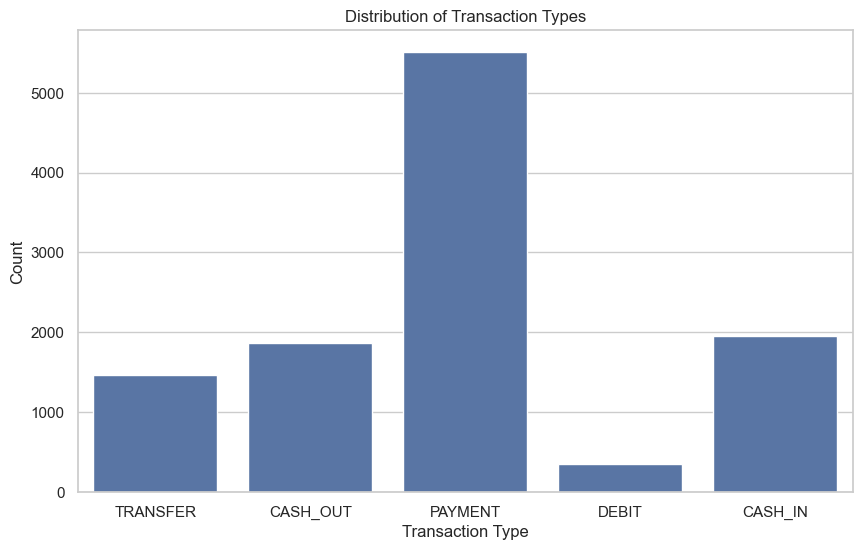

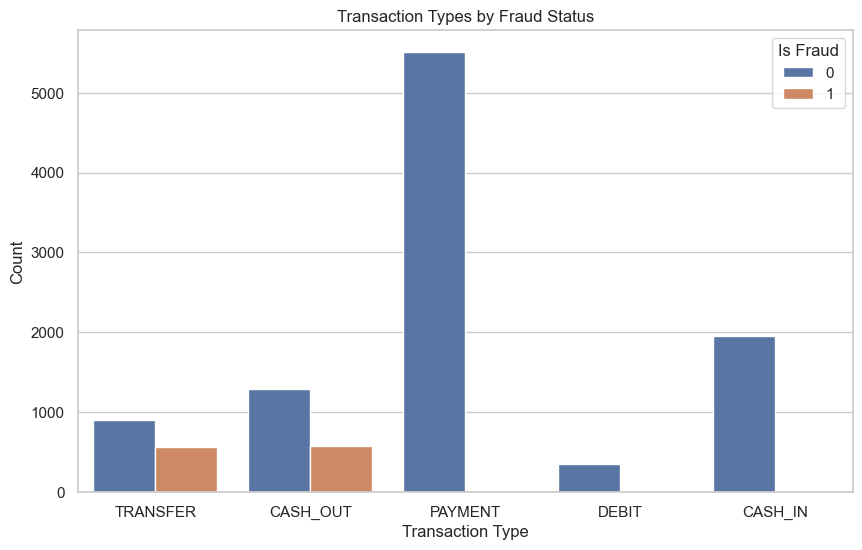

In [15]:
#  Transaction Types vs. Fraud
print("\n Transaction Type Distribution by Fraud Status:")
print(pd.crosstab(df['type'], df['isFraud'], normalize='index').applymap(lambda x: f'{x:.2%}'))

# Transaction Types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Types by Fraud Status')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud')
plt.show()

       type   isFraud
0   CASH_IN  0.000000
1  CASH_OUT  0.308926
2     DEBIT  0.000000
3   PAYMENT  0.000000
4  TRANSFER  0.385246


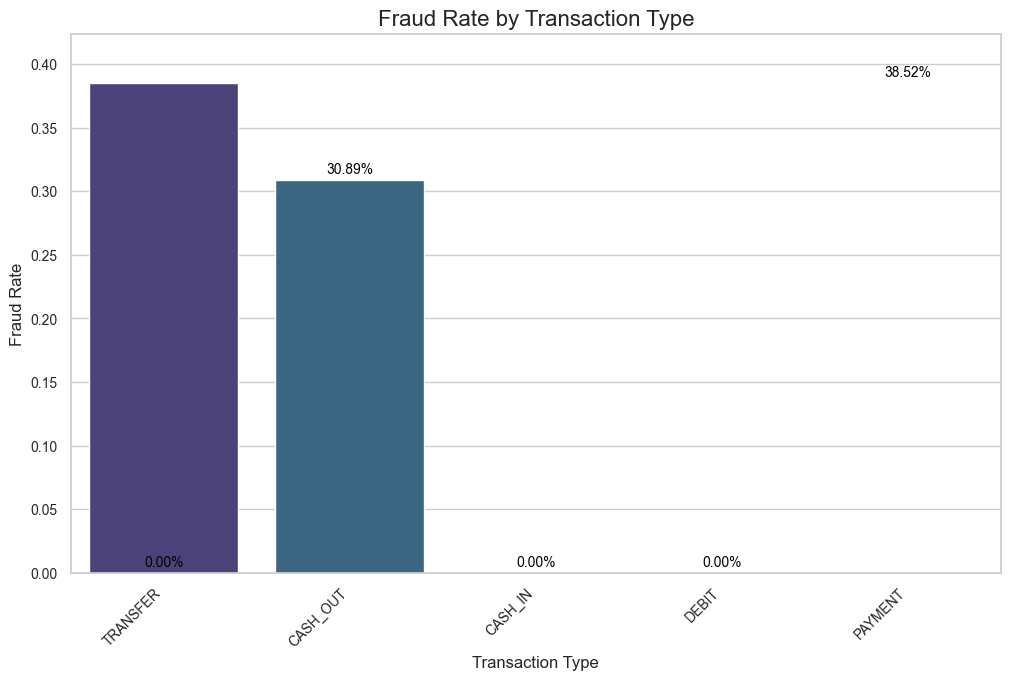

In [16]:
fraud_rate_by_type = df.groupby('type')['isFraud'].mean().reset_index()
print(fraud_rate_by_type)

fraud_rate_by_type = fraud_rate_by_type.sort_values(by='isFraud', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='type', y='isFraud', data=fraud_rate_by_type, palette='viridis')

plt.title('Fraud Rate by Transaction Type', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Fraud Rate', fontsize=12)
plt.ylim(0, fraud_rate_by_type['isFraud'].max() * 1.1)
plt.yticks(fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)

for index, row in fraud_rate_by_type.iterrows():
    plt.text(index, row['isFraud'] + 0.005, f'{row["isFraud"]:.2%}', color='black', ha="center", fontsize=10)


plt.show()

In [17]:
df['amount'].describe().astype(int)

count       11142
mean       213191
std        760065
min             2
25%          4946
50%         16761
75%        154336
max      10000000
Name: amount, dtype: int64

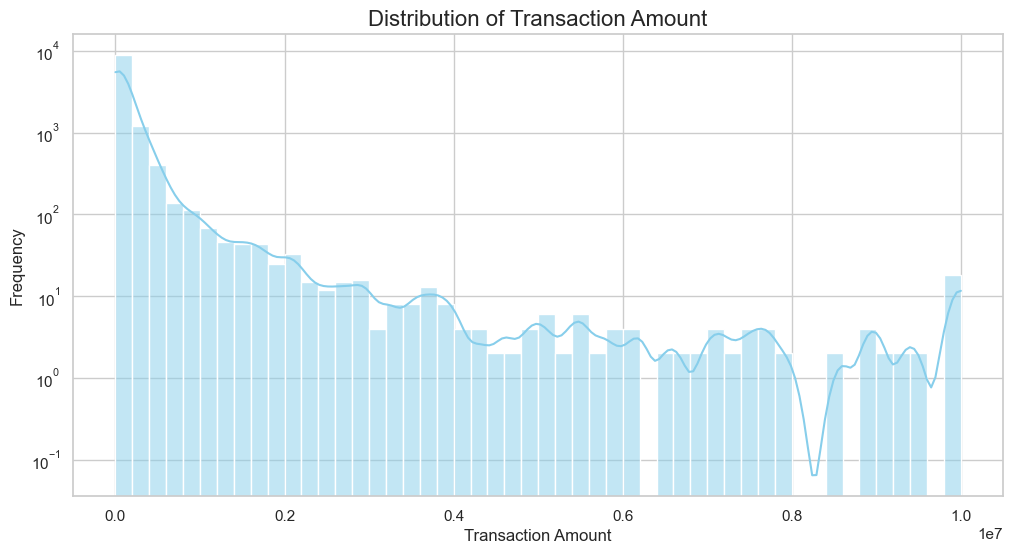

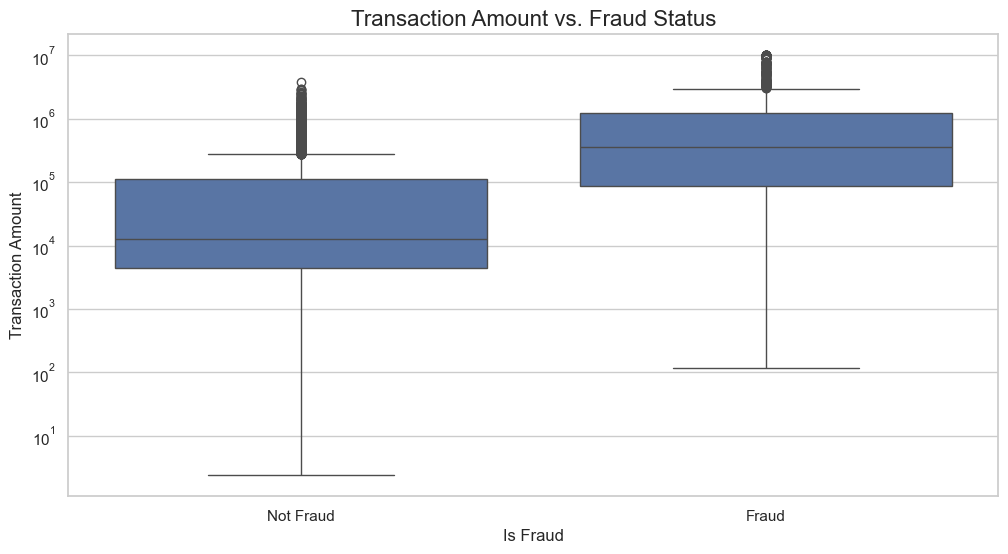

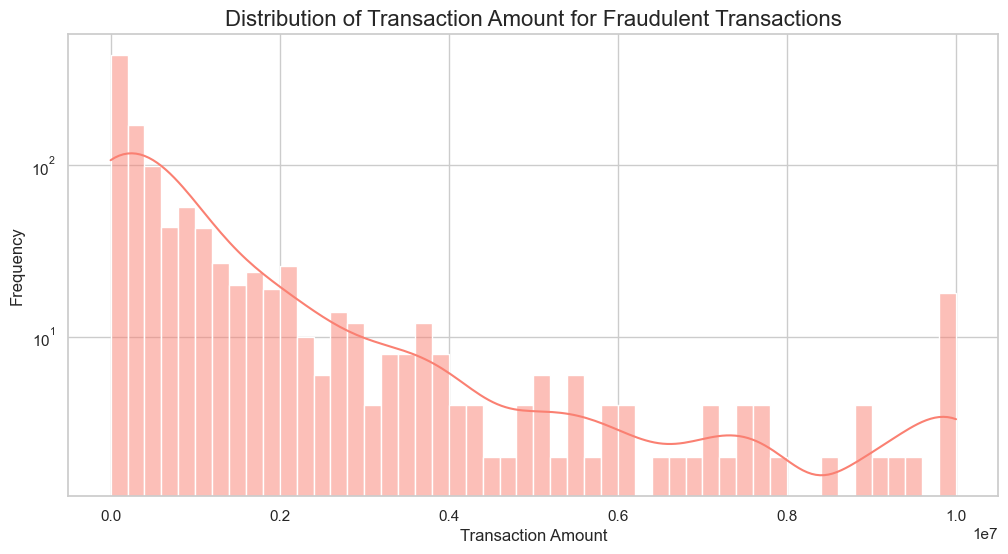

In [18]:
# Distribution of Transaction Amount
plt.figure(figsize=(12, 6))
sns.histplot(df['amount'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amount', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.show()

# Box plot to visualize the distribution and detect outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs. Fraud Status', fontsize=16)
plt.xlabel('Is Fraud', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.yscale('log')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.show()

# Distribution of amount specifically for fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(df[df['isFraud'] == 1]['amount'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Transaction Amount for Fraudulent Transactions', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')
plt.show()

In [19]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [20]:
df['balancedifforg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balancediffdest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [21]:
(df["balancedifforg"] < 0).sum()

np.int64(1921)

In [22]:
(df["balancediffdest"] < 0).sum()

np.int64(2201)

In [23]:
df.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0


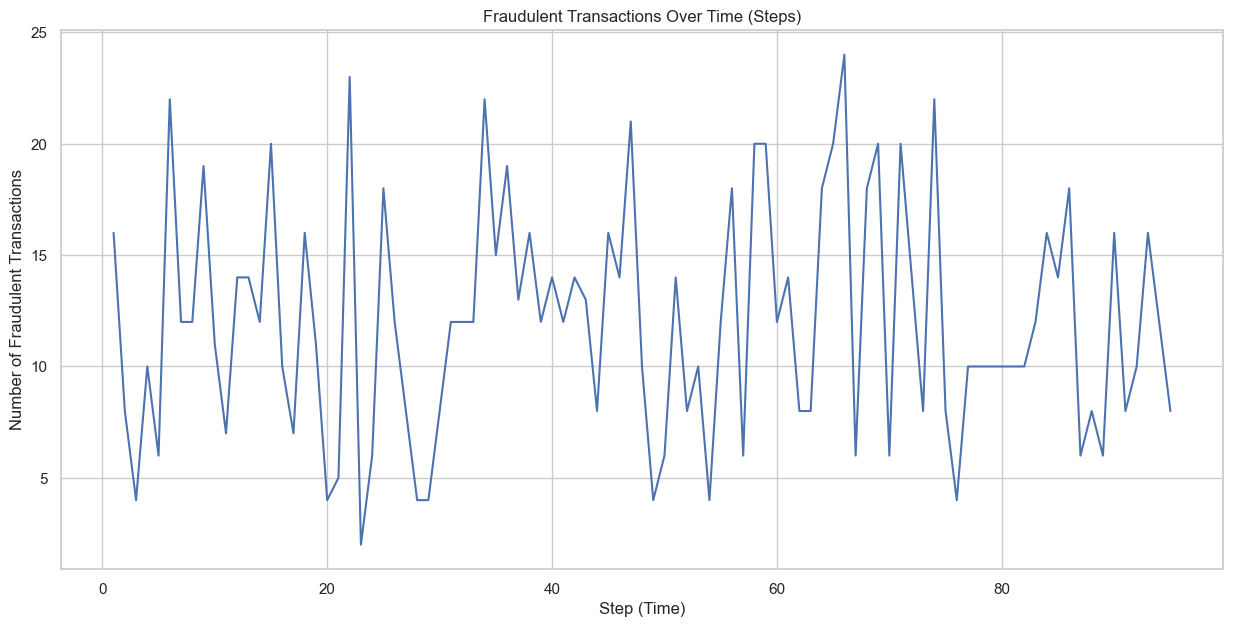

In [24]:
fraud_per_step = df.groupby('step')['isFraud'].sum().reset_index()

plt.figure(figsize=(15, 7))
plt.plot(fraud_per_step['step'], fraud_per_step['isFraud'])
plt.title('Fraudulent Transactions Over Time (Steps)')
plt.xlabel('Step (Time)')
plt.ylabel('Number of Fraudulent Transactions')
plt.grid(True)
plt.show()

In [25]:
df.drop('step', axis=1, inplace=True)

In [26]:
df.head(2)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0


In [27]:
top_senders = df['nameOrig'].value_counts().head(10)
top_senders

nameOrig
C1637966097    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C137533655     1
C548454569     1
C1190697059    1
C1867037662    1
C965014368     1
Name: count, dtype: int64

In [28]:
top_receivers = df['nameDest'].value_counts().head(10)
top_receivers

nameDest
C985934102     62
C1590550415    52
C1286084959    50
C1899073220    44
C977993101     44
C1782113663    43
C451111351     43
C2083562754    41
C1789550256    40
C1360767589    40
Name: count, dtype: int64

In [29]:
fraud_users = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(5)
fraud_users

nameOrig
C409531429     1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
Name: count, dtype: int64

In [30]:
fraud_types = df[df['type'].isin(["TRANSFER","CASH_OUT"])]
fraud_types["type"].value_counts()

type
CASH_OUT    1871
TRANSFER    1464
Name: count, dtype: int64

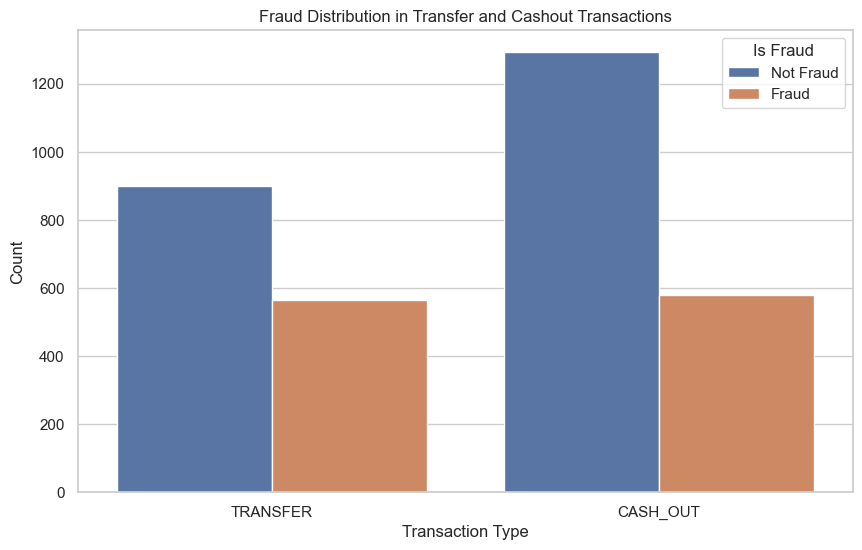

In [31]:
fraud_types_subset = df[df['type'].isin(["TRANSFER","CASH_OUT"])]

plt.figure(figsize=(10, 6))
sns.countplot(x='type', hue='isFraud', data=fraud_types_subset)
plt.title('Fraud Distribution in Transfer and Cashout Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.legend(title='Is Fraud', labels=['Not Fraud', 'Fraud'])
plt.show()

In [32]:
corr = df[['amount',"oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","isFraud"]].corr()
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,0.323943,-0.007816,0.094117,0.227413,0.435490
oldbalanceOrg,0.323943,1.000000,0.937024,0.207628,0.209787,0.046445
newbalanceOrig,-0.007816,0.937024,1.000000,0.234148,0.190314,-0.127912
oldbalanceDest,0.094117,0.207628,0.234148,1.000000,0.928831,-0.056575
newbalanceDest,0.227413,0.209787,0.190314,0.928831,1.000000,-0.002864
isFraud,0.435490,0.046445,-0.127912,-0.056575,-0.002864,1.000000


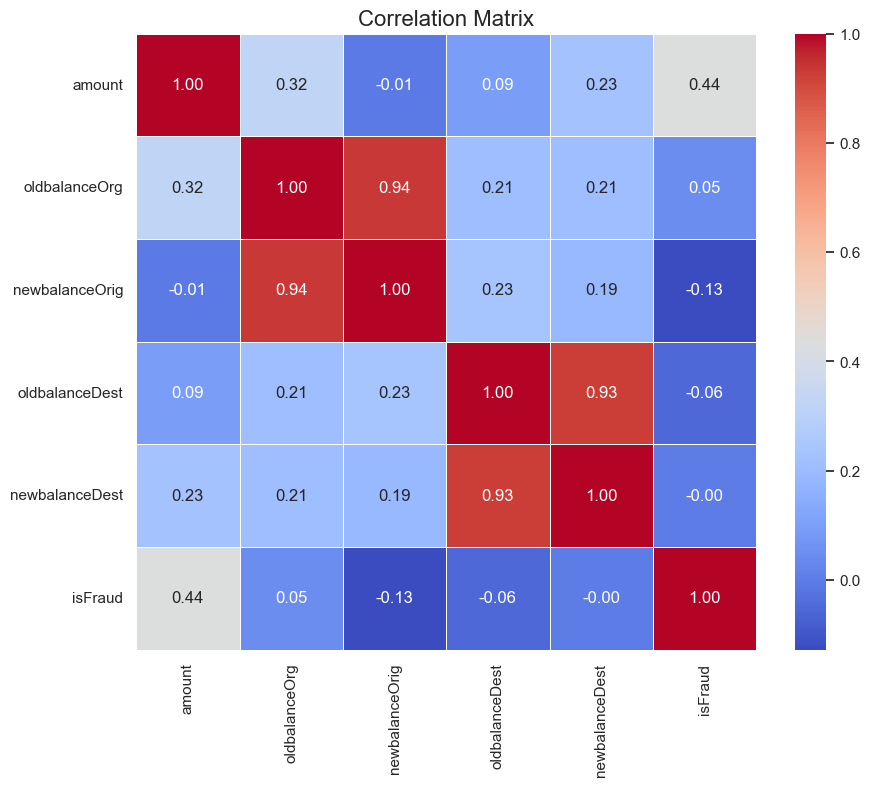

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [34]:
zero_after_transfer = df[
    (df['oldbalanceOrg'] > 0 ) &
    (df['newbalanceOrig'] == 0) &
    (df["type"].isin(['TRANSFER', 'CASH_OUT']))

]

In [35]:
len(zero_after_transfer)

1791

In [36]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


# **Feature Extraction**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [38]:
df.head(5)

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,181.0,-21182.0
2,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,2806.0,0.0
3,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,2806.0,-26202.0
4,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,20128.0,0.0


In [39]:
df_mdl = df.drop(["nameOrig","nameDest"],axis = 1)

In [40]:
df_mdl.head(2)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedifforg,balancediffdest
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,1,181.0,0.0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,1,181.0,-21182.0


In [41]:
categorical = ["type"]
numerical = ["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]

In [42]:
X = df_mdl.drop('isFraud', axis=1)
y = df_mdl['isFraud']

In [43]:
X.head(4)

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,balancedifforg,balancediffdest
0,TRANSFER,181.0,181.0,0.0,0.0,0.0,181.0,0.0
1,CASH_OUT,181.0,181.0,0.0,21182.0,0.0,181.0,-21182.0
2,TRANSFER,2806.0,2806.0,0.0,0.0,0.0,2806.0,0.0
3,CASH_OUT,2806.0,2806.0,0.0,26202.0,0.0,2806.0,-26202.0


In [44]:
y.head(4)

0    1
1    1
2    1
3    1
Name: isFraud, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(drop = "first"), categorical)
    ],
    remainder='drop'

    )

In [47]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])

models = {
    'Logistic Regression':  LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'XGBoost': XGBClassifier(scale_pos_weight=ratio, use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(is_unbalance=True, random_state=42)
}

pipelines = {}
for name, model in models.items():
    pipelines[name] = Pipeline(steps=[('preprocessor', preprocessor),
                                      ('classifier', model)])

fitted_pipelines = {}
for name, pipeline in pipelines.items():
    print(f"Training {name}...")
    pipeline.fit(X_train, y_train)
    fitted_pipelines[name] = pipeline
    print(f"{name} training complete.")





Training Logistic Regression...
Logistic Regression training complete.
Training Random Forest...
Random Forest training complete.
Training XGBoost...
XGBoost training complete.
Training LightGBM...
[LightGBM] [Info] Number of positive: 912, number of negative: 8001
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000872 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 8913, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.102322 -> initscore=-2.171682
[LightGBM] [Info] Start training from score -2.171682
LightGBM training complete.


In [48]:
fitted_pipelines['Logistic Regression']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [49]:
fitted_pipelines['Random Forest']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [50]:
fitted_pipelines['XGBoost']


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=N...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [51]:
fitted_pipelines['LightGBM']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['amount', 'oldbalanceOrg',
                                                   'newbalanceOrig',
                                                   'oldbalanceDest',
                                                   'newbalanceDest']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['type'])])),
                ('classifier',
                 LGBMClassifier(is_unbalance=True, random_state=42))])

In [52]:

results = {}
for name, pipeline in fitted_pipelines.items():
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Classification Report': report,
        'Confusion Matrix': conf_matrix
    }

    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:\n", conf_matrix)


new_sample = pd.DataFrame([{
    'type': 'TRANSFER',
    'amount': 10000.0,
    'oldbalanceOrg': 10000.0,
    'newbalanceOrig': 0.0,
    'oldbalanceDest': 0.0,
    'newbalanceDest': 0.0,
    'balancedifforg': 10000.0,
    'balancediffdest': 0.0
}])

print("\n--- Example Prediction with a new sample ---")
for name, pipeline in fitted_pipelines.items():
    prediction = pipeline.predict(new_sample)
    print(f"{name} Prediction: {'Fraud' if prediction[0] == 1 else 'Not Fraud'}")


--- Logistic Regression Results ---
Accuracy: 0.9556
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1999
           1       1.00      0.57      0.73       230

    accuracy                           0.96      2229
   macro avg       0.98      0.78      0.85      2229
weighted avg       0.96      0.96      0.95      2229

Confusion Matrix:
 [[1999    0]
 [  99  131]]

--- Random Forest Results ---
Accuracy: 0.9955
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1999
           1       0.98      0.97      0.98       230

    accuracy                           1.00      2229
   macro avg       0.99      0.99      0.99      2229
weighted avg       1.00      1.00      1.00      2229

Confusion Matrix:
 [[1995    4]
 [   6  224]]

--- XGBoost Results ---
Accuracy: 0.9969
Classification Report:
              precision    recall  f1-sco


--- ROC Curves and AUC Scores ---
Logistic Regression AUC: 0.9866
Random Forest AUC: 0.9950
XGBoost AUC: 0.9978
LightGBM AUC: 0.9986


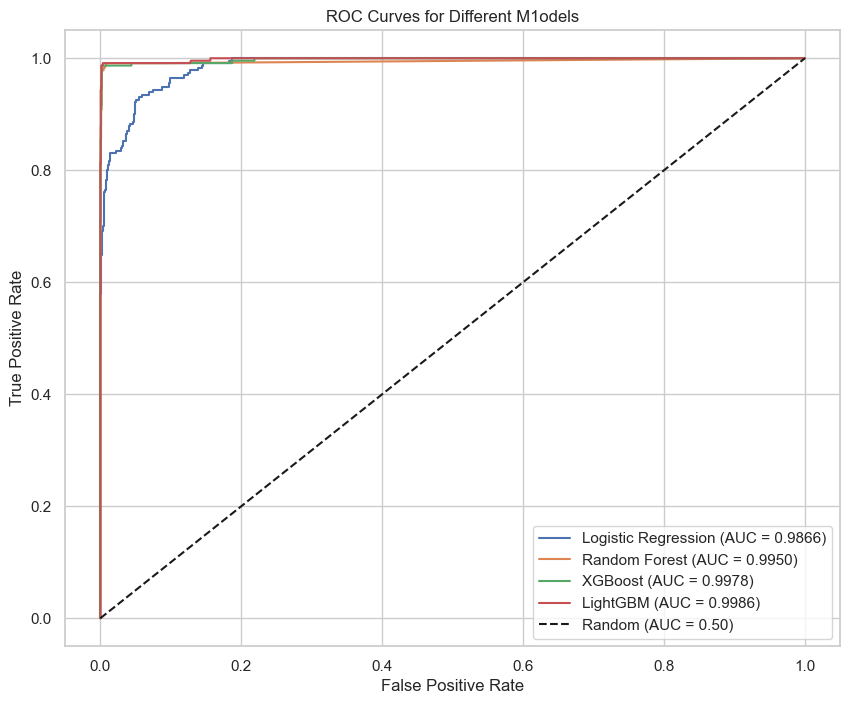

In [53]:
# roc and auc 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
print("\n--- ROC Curves and AUC Scores ---")

plt.figure(figsize=(10, 8))

for name, pipeline in fitted_pipelines.items():
    if hasattr(pipeline.named_steps['classifier'], 'predict_proba'):
        y_prob = pipeline.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_prob)
        auc_score = roc_auc_score(y_test, y_prob)
        print(f"{name} AUC: {auc_score:.4f}")

        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})')
    else:
        print(f"{name} does not support predict_proba. Skipping ROC/AUC calculation.")


plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different M1odels')
plt.legend()
plt.grid(True)
plt.show()


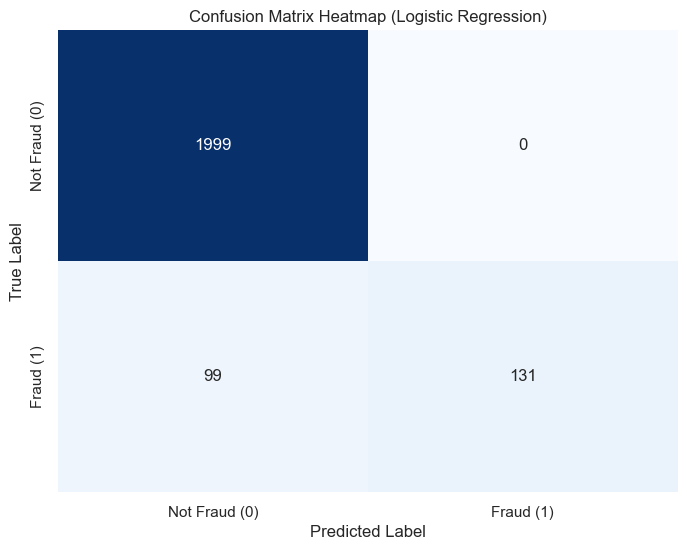

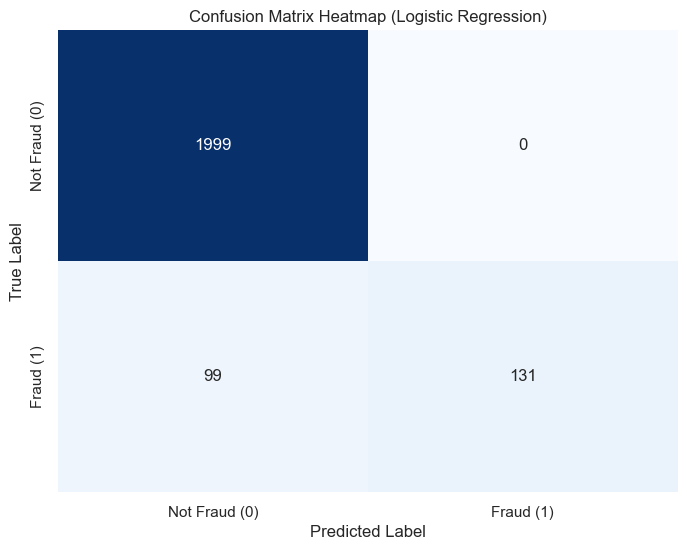

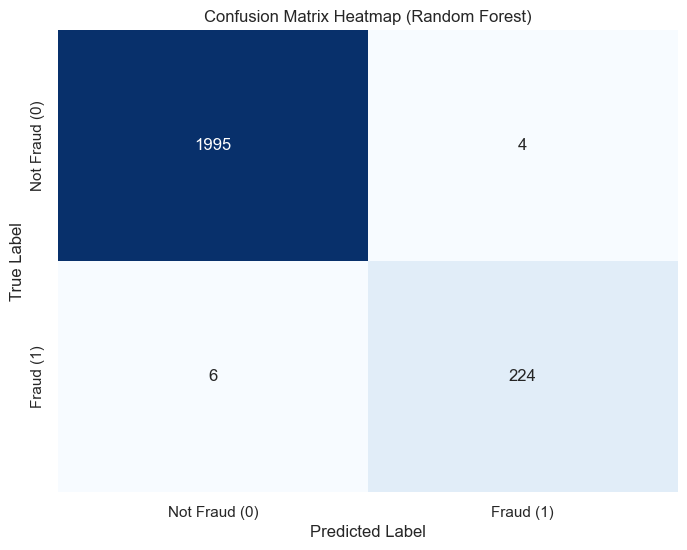

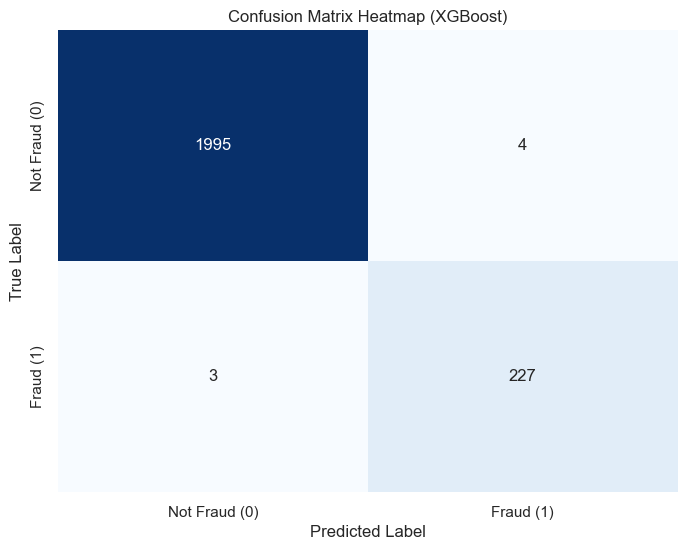

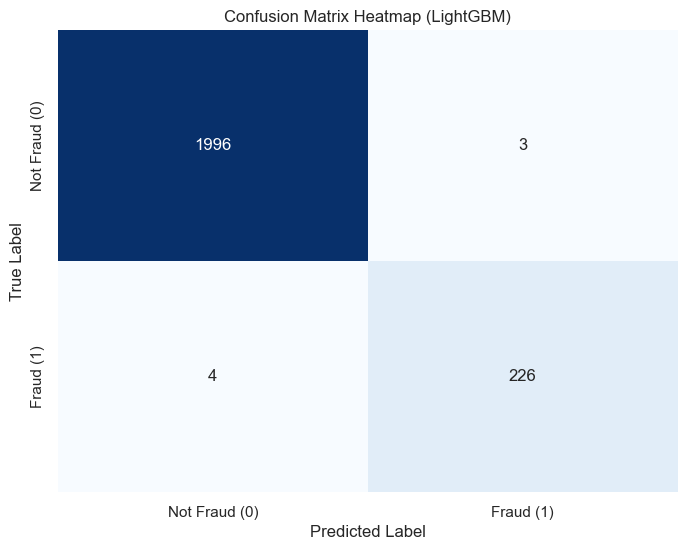

In [54]:
conf_matrix_lr = results['Logistic Regression']['Confusion Matrix']


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud (0)', 'Fraud (1)'], yticklabels=['Not Fraud (0)', 'Fraud (1)'])
plt.title('Confusion Matrix Heatmap (Logistic Regression)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


for name, result in results.items():
    conf_matrix = result['Confusion Matrix']

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Fraud (0)', 'Fraud (1)'], yticklabels=['Not Fraud (0)', 'Fraud (1)'])
    plt.title(f'Confusion Matrix Heatmap ({name})')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [55]:
results = {}
for name, pipeline in fitted_pipelines.items():
  y_pred = pipeline.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  results[name] = {
      'Accuracy': accuracy,
  }

  print(f"\n--- {name} Results ---")
  print(f"Accuracy: {accuracy:.4f}")


--- Logistic Regression Results ---
Accuracy: 0.9556

--- Random Forest Results ---
Accuracy: 0.9955

--- XGBoost Results ---
Accuracy: 0.9969

--- LightGBM Results ---
Accuracy: 0.9969


In [56]:
import joblib
joblib.dump(fitted_pipelines['XGBoost'], 'xgboost_fraud_model.pkl')


['xgboost_fraud_model.pkl']